<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler, RobustScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

from sklearn.preprocessing import OneHotEncoder #, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from category_encoders import TargetEncoder 
import sys
import os
sys.path.append(os.path.abspath("src"))   
import soporte_preprocesamiento_clustering as f

# **MODELOS DE ML NO SUPERVISADOS**  
**CLUSTERING**

In [2]:
df_crudo=pd.read_csv("datos\WrestlingWorldTournament.csv", index_col="Unnamed: 0")

In [3]:
df_crudo.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [4]:
f.exploracion_dataframe(df_crudo, "sports", estadisticos = False)

El número de datos es 500 y el de columnas es 14

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
name,object
gender,object
age,int64
height,float64
nationality,object
weight,int64
sports,object
hours_per_day,int64
strength,int64
agility,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 500 categorías (5/500)


,count
name,
Zenaida Flagge,1
Aaron Peavy,1
Abe Rutland,1
Adrian Quinn,1
Viola Lonergan,1


La columna GENDER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
gender,
Female,265
Male,235


La columna NATIONALITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
nationality,
France,118
Japan,116
USA,115
Australia,64
Egypt,42


La columna SPORTS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 31 categorías (5/31)


,count
sports,
Karate,42
MMA,34
Boxing,33
"Boxing, MMA",31
Judo,29


La columna FEDERATION tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
federation,
Fight Zone Wrestling,206
Consejo Global de Lucha Libre,192
World Wrestling Entertainment,102



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


None

## EDA  
  
**NULOS**  
No se han identificado nulos  
  
**DUPLICADOS**  
No se han identificado duplicados  

**FORMATEOS**  
Las siguientes columnas se pasan a categóricas:  
- Horas por día  
- Fuerza  
- Agilidad  
- Mental  
  

**COLUMNAS A ELIMINAR**  
- Me he dado cuenta que tanto name como rank son identificadores únicos por ello pienso que tiene sentido convertir name en el indice y rank eliminarla.  

- Además me cargo también federation ya que por el contexto y lo que se pretende conseguir no aporta.


**COLUMNAS MUY RELACIONADAS**  
- Se ha identificado una correlación de -0.9 entre el año de comienzo y la edad (lo que tiene mucho sentido) y una de 1 entre peso y altura.  

- También son altas (0.7) las correlaciones entre fuerza con altura y peso lo que es de sentido común también.      


     
**DATOS DE INTERÉS**  
- En la EDAD no se aprecia una gran variación ni distorsión en la media con respecto a la mediana.  
  
- En la ALTURA no se aprecia una gran variación ni distorsión en la media con respecto a la mediana.     
  
- En el PESO se aprecia una moderada variación (11 kilos) lo que tiene sentido teniendo en cuenta que hay hombres y mujeres. No hay distorsión en la media con respecto a la mediana.  
  
- En las HORAS DE ENTRENAMIENTO DIARIO no se aprecia una gran variación ni una distorsión en la media con respecto a la mediana.  
  
- En FUERZA no se aprecia una gran variación ni distorsión en la media con respecto a la mediana.   
  
- En la AGILIDAD no se aprecia una gran variación ni distorsión en la media con respecto a la mediana.   
  
- En la CAPACIDAD MENTAL no se aprecia una gran variación pero si una leve distorsión en la media con respecto a la mediana.  
  
- En el AÑO DE COMIENZO no se aprecia una gran variación  ni una distorsión en la media con respecto a la mediana.  
  
- En el RANKING se aprecia una gran variación (144) pero no una distorsión en la media con respecto a la mediana.  
  
**OUTLIERS** 
- En términos generales no parece haber demasiados como nos muestran los buenos ajustes entre la media y la mediana. 

- Solo se identifican en Años y en Año de comienzo (porque horas por día es categórica).   
    
  

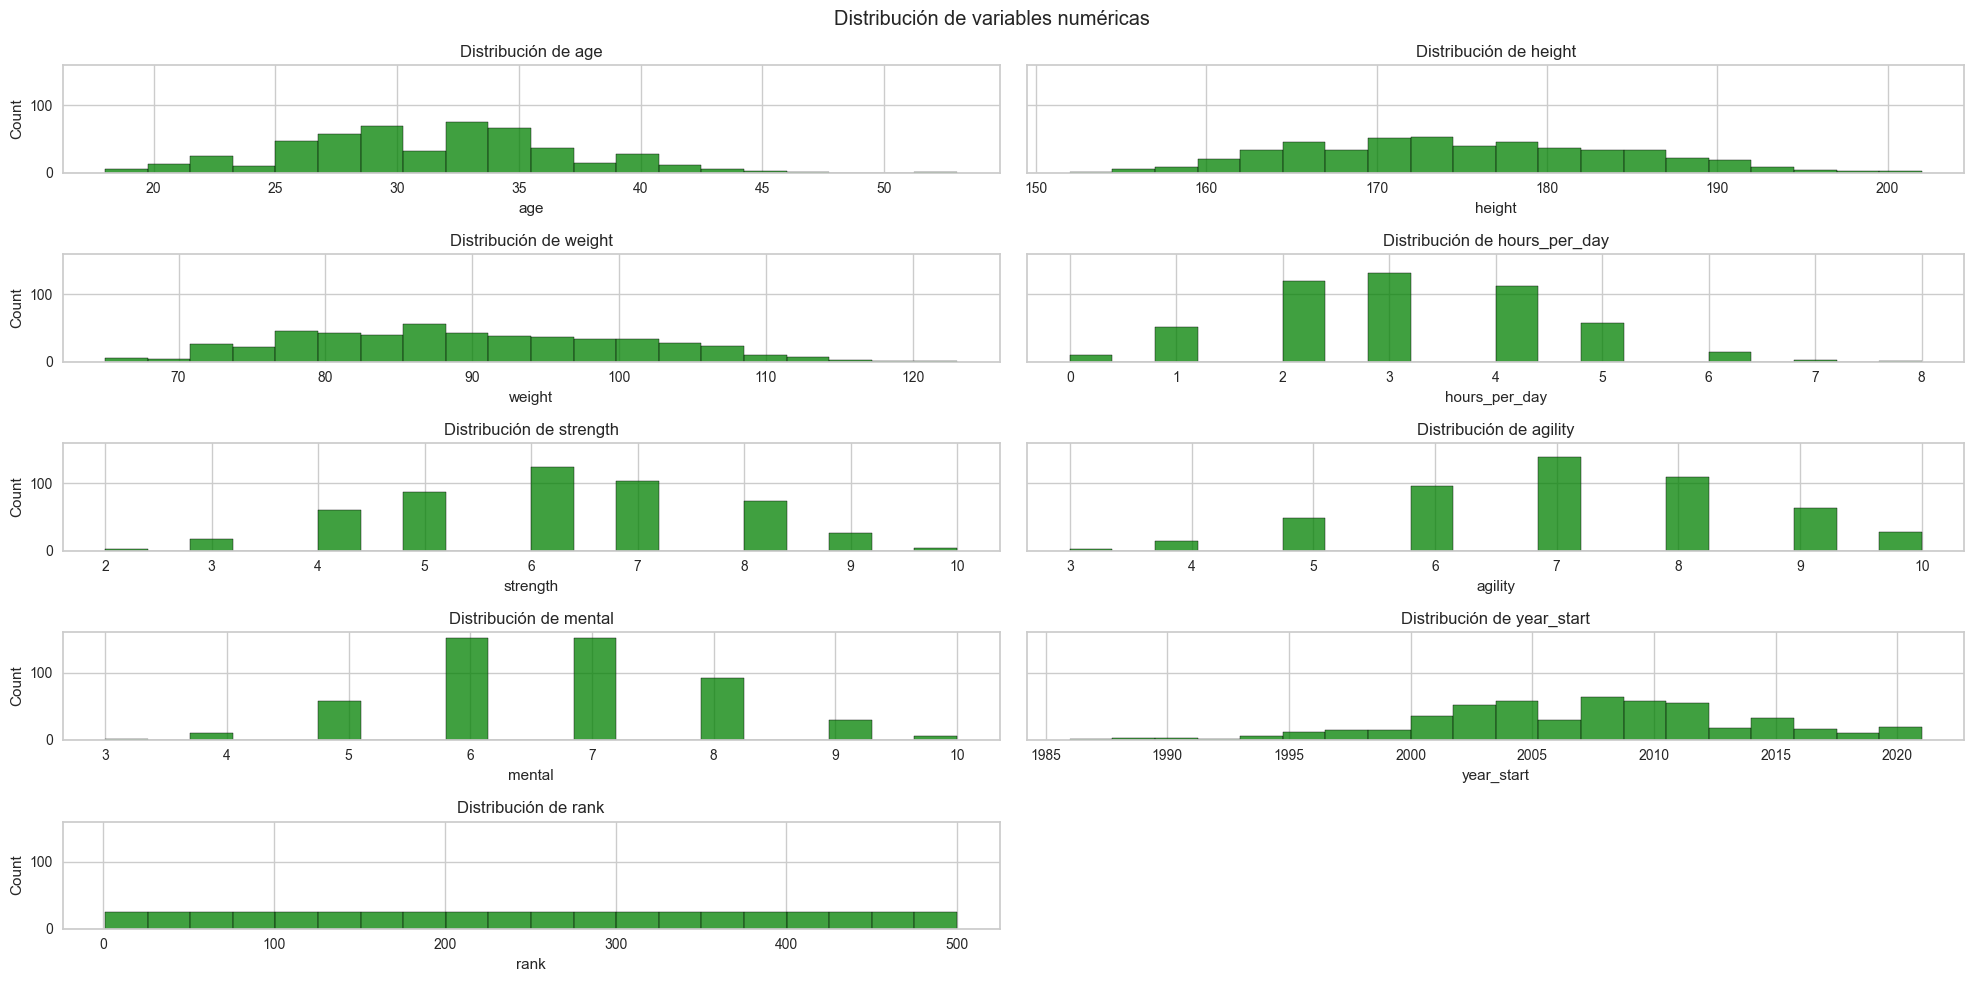

In [5]:
visualizador=f.Visualizador(df_crudo)
visualizador.plot_numericas(color="green", tamano_grafica=(20, 10))

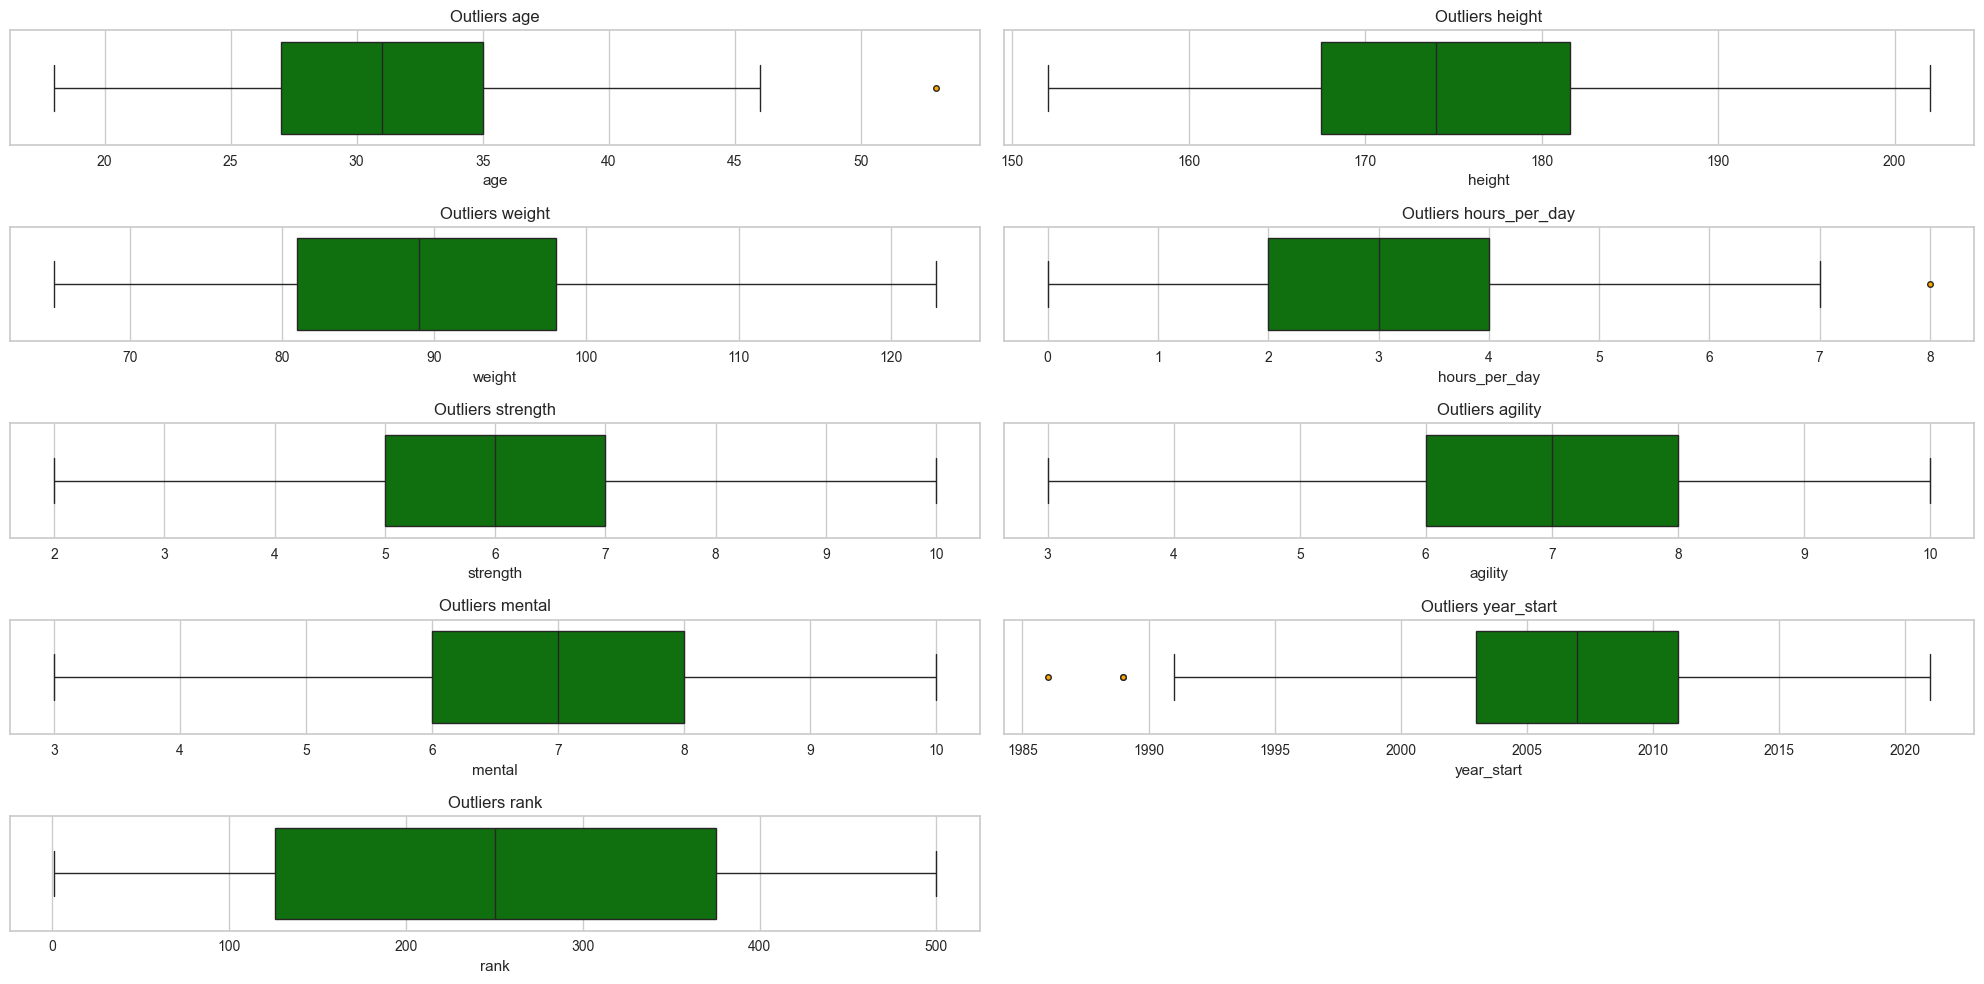

In [6]:
visualizador.deteccion_outliers( color = "green")

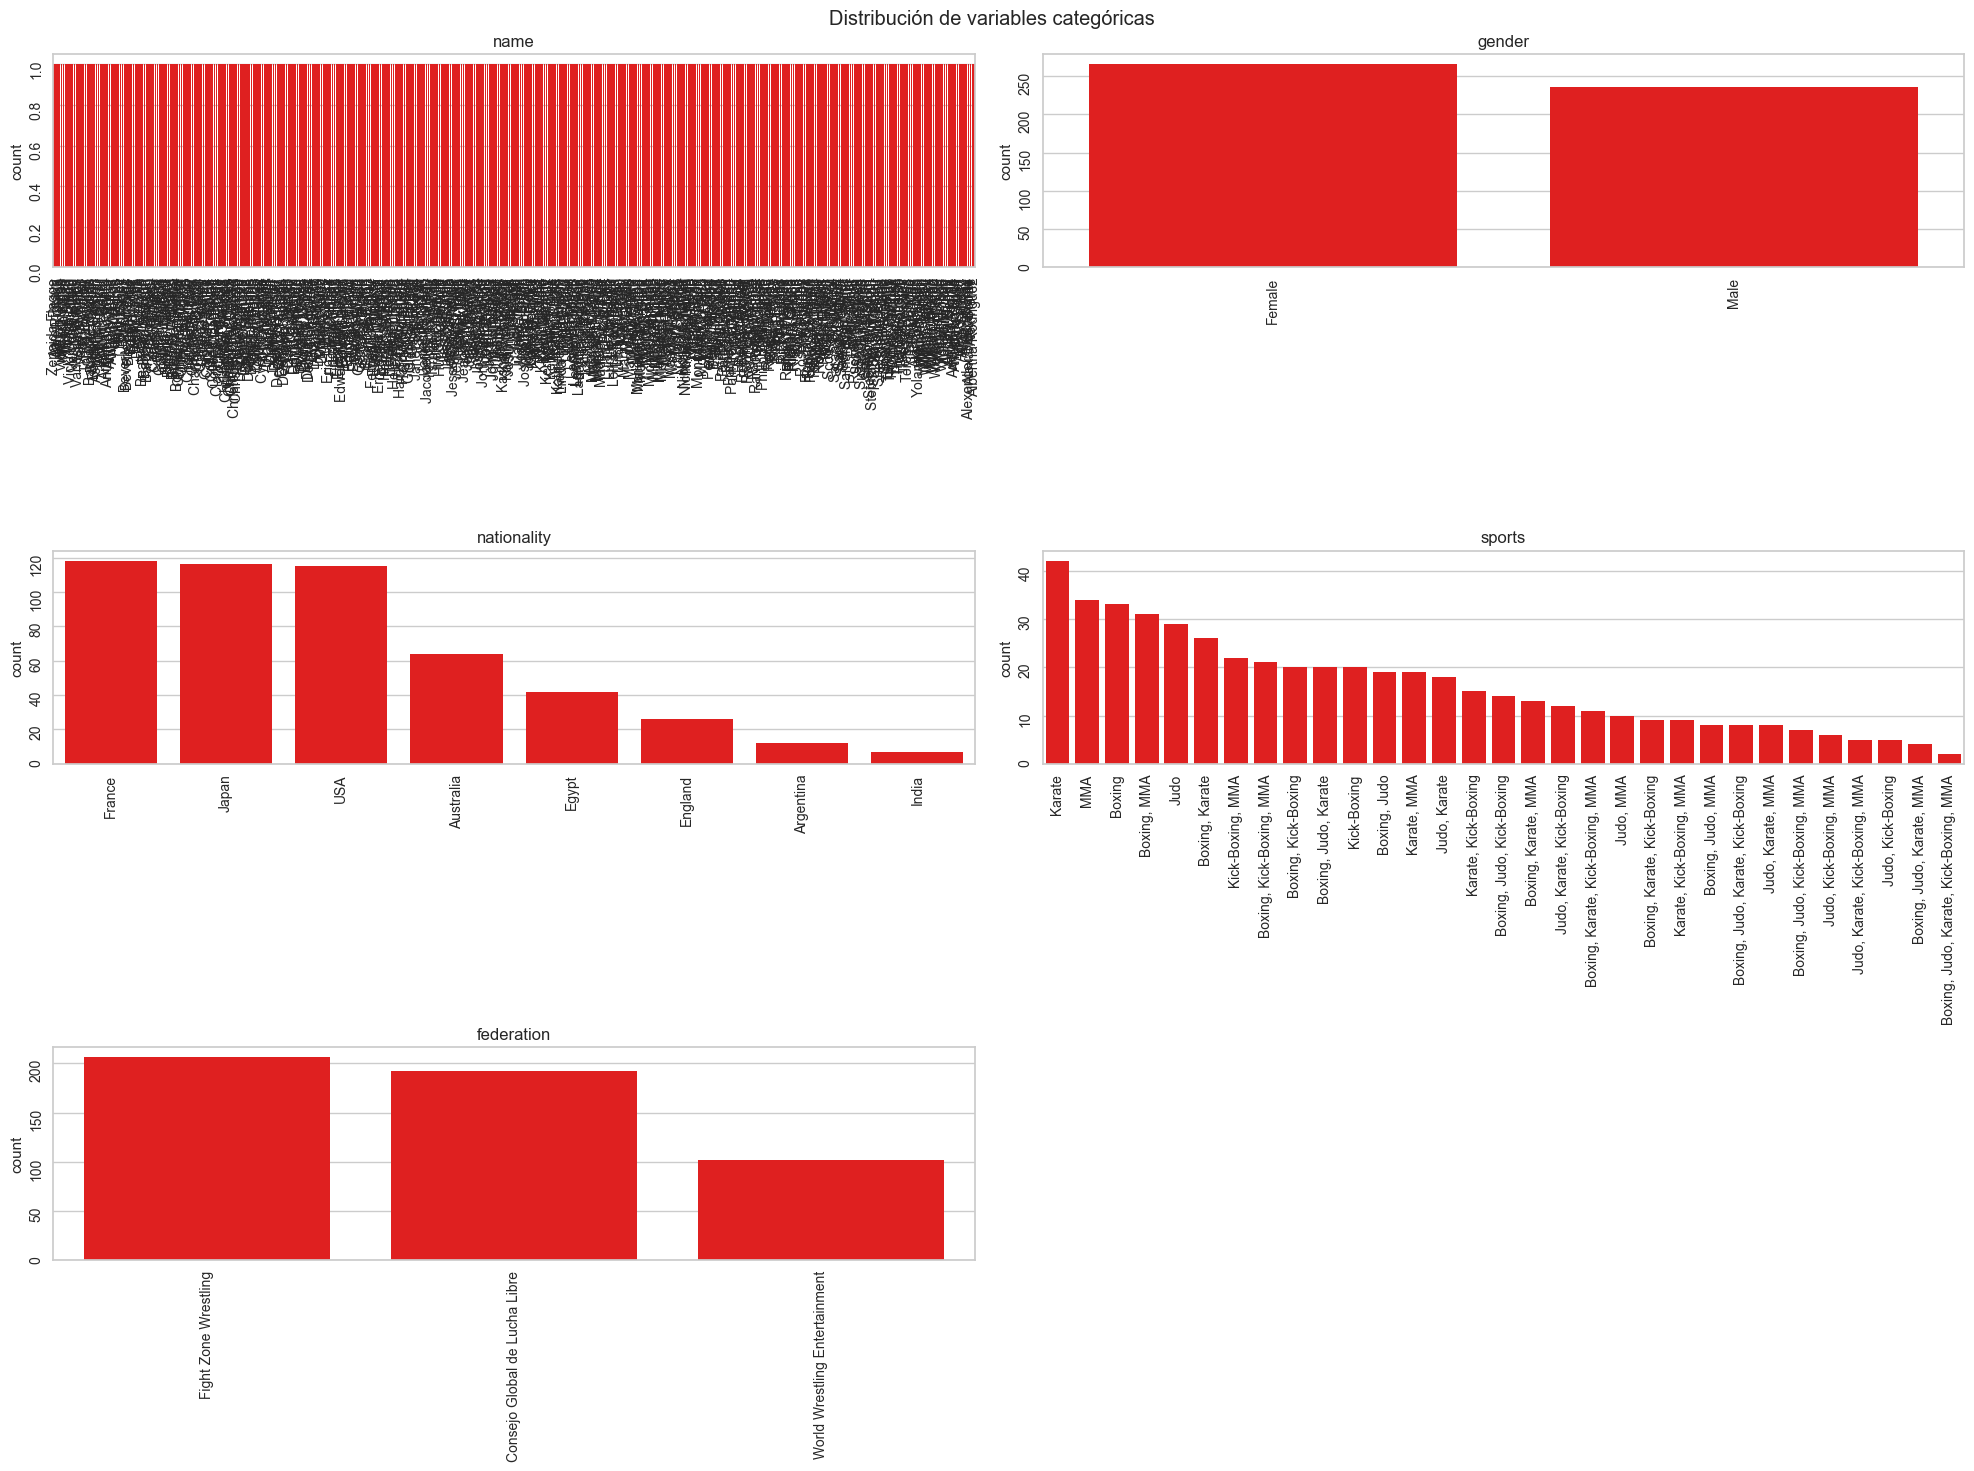

In [7]:
visualizador.plot_categoricas(color="red", tamano_grafica=(20, 15))

Lo que sacamos en claro de ambas gráficas es que hay muy pocos outliers y que hay ciertas variables numéricas que tienen más sentido como categóricas

In [8]:
df_crudo["age"].sort_values().tail(3)

76     45
116    46
324    53
Name: age, dtype: int64

In [9]:
df_crudo["year_start"].sort_values().head(4)

324    1986
0      1989
106    1989
39     1991
Name: year_start, dtype: int64

In [10]:
df_crudo["hours_per_day"].sort_values().tail(2)

197    7
50     8
Name: hours_per_day, dtype: int64

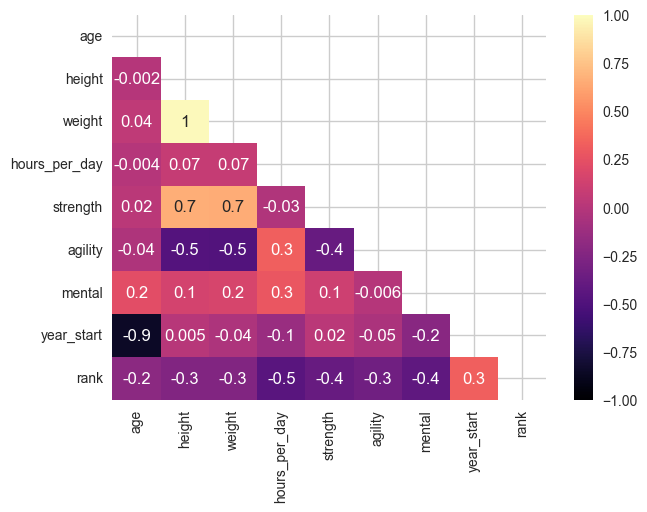

In [11]:
visualizador.correlacion(tamano_grafica = (7, 5))

#### Me cargo rank

In [12]:
df_crudo.drop(columns=["rank","federation"], inplace=True)

In [13]:
lista_cols=df_crudo.columns.drop("name")

In [14]:
lista_cols_completas=df_crudo.columns

#### Cambio las columnas correspondientes a categóricas

In [15]:
df_crudo["hours_per_day"]=df_crudo["hours_per_day"].astype("O")
df_crudo["strength"]=df_crudo["strength"].astype("O")
df_crudo["agility"]=df_crudo["agility"].astype("O")
df_crudo["mental"]=df_crudo["mental"].astype("O")

In [16]:
df_categoricas=df_crudo.select_dtypes(include=["object", "category"])

# ENCODING

In [17]:
diccionario_encoding = {"onehot": ["gender"], 
                        "dummies": [],
                        'ordinal' : { }, 
                        "label": [] , 
                        "frequency": [], 
                        "target": []  
                        }

In [18]:
df_crudo.head(3)

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,1989
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,2006
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,2012


ONE HOT

In [19]:
cols_onehot = ["gender"]
one_hot_encoder = OneHotEncoder(categories='auto', 
                        drop=None, 
                        sparse_output=True, 
                        dtype='float', 
                        handle_unknown='error')

encoder_trans = one_hot_encoder.fit_transform(df_crudo[cols_onehot])
encoder_array = encoder_trans.toarray()

# usamos el método get_feature_names_out() para extraer el nombre de las columnas
nombre_columnas = one_hot_encoder.get_feature_names_out()

encoder_df = pd.DataFrame(encoder_array, columns = nombre_columnas)
df_crudo = pd.concat([df_crudo, encoder_df], axis = 1)
df_crudo.drop(columns=cols_onehot, inplace=True)

In [20]:
df_crudo.shape

(500, 13)

In [21]:
df_crudo.head()

,name,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
0,Aaron Peavy,41,165.0,England,82,"Boxing, MMA",3,7,8,7,1989,1.0,0.0
1,Abe Rutland,36,185.0,Japan,100,Judo,0,8,5,9,2006,0.0,1.0
2,Adrian Quinn,29,178.5,Japan,93,Karate,4,8,8,7,2012,0.0,1.0
3,Alan Beckham,39,187.5,Japan,107,Judo,3,7,6,8,2003,0.0,1.0
4,Albertha Rodriguez,29,158.0,USA,72,MMA,1,5,7,7,2012,1.0,0.0


#### Meto name en el index

In [22]:
df_crudo.set_index("name", inplace=True)


In [23]:
df_encoded=f.codificar(df_crudo)

Uso Frequecy para los que tienen muchas categorías o cuando hay una que domina frente a otras.  
El resto con One-Hot-Encoder

In [24]:
df_encoded.head()

,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
name,,,,,,,,,,,,
Aaron Peavy,41,165.0,0.052,82,0.062,0.264,0.206,0.218,0.304,1989,1.0,0.0
Abe Rutland,36,185.0,0.232,100,0.058,0.020,0.148,0.096,0.058,2006,0.0,1.0
Adrian Quinn,29,178.5,0.232,93,0.084,0.224,0.148,0.218,0.304,2012,0.0,1.0
Alan Beckham,39,187.5,0.232,107,0.058,0.264,0.206,0.192,0.184,2003,0.0,1.0
Albertha Rodriguez,29,158.0,0.230,72,0.068,0.102,0.174,0.278,0.304,2012,1.0,0.0


In [25]:
df_encoded.shape

(500, 12)

In [26]:
df_encoded.reset_index(inplace=True)

In [27]:
df_encoded.head()

,name,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
0,Aaron Peavy,41,165.0,0.052,82,0.062,0.264,0.206,0.218,0.304,1989,1.0,0.0
1,Abe Rutland,36,185.0,0.232,100,0.058,0.020,0.148,0.096,0.058,2006,0.0,1.0
2,Adrian Quinn,29,178.5,0.232,93,0.084,0.224,0.148,0.218,0.304,2012,0.0,1.0
3,Alan Beckham,39,187.5,0.232,107,0.058,0.264,0.206,0.192,0.184,2003,0.0,1.0
4,Albertha Rodriguez,29,158.0,0.230,72,0.068,0.102,0.174,0.278,0.304,2012,1.0,0.0


## ESTANDARIZO

In [28]:
scaler=MinMaxScaler()
nums=df_encoded.select_dtypes(include=np.number)
nums.drop(columns=["gender_Female", "gender_Male"], inplace=True)
cols_num=nums.columns
dfa=scaler.fit_transform(nums)
df=pd.DataFrame(dfa, columns=cols_num)
df_encoded[cols_num]= df

In [29]:
df_encoded.head()

,name,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male
0,Aaron Peavy,0.657143,0.26,0.171171,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0
1,Abe Rutland,0.514286,0.66,0.981982,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0
2,Adrian Quinn,0.314286,0.53,0.981982,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0
3,Alan Beckham,0.600000,0.71,0.981982,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0
4,Albertha Rodriguez,0.314286,0.12,0.972973,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0


In [30]:
df_encoded.set_index("name", inplace=True)

### Métodos de CLUSTERIZACIÓN  
  
**KMEANS**  
    - Coge todas las filas una a una  y calcula las distancias    
        - Ej: coge a Elena primero y calcula  la distancia desde Elena al resto de datos, luego coge primero a Nelson y calcula su distancia con respecto al resto... así hasta que todos los datos ya han sido primeros y hace agrupaciones teniendo en cuenta las distancias.        
    - Se usa el método del CODO para elegir el número de grupos(paquetitos) que queremos  
    - Para las distancias las calcúla :  
       
        - Euclidia calcula la distancia con lineas rectas (por defecto)
        - Manhattan calcula la distancia en cuadras (horizontal o vertical) (si hay valores atípicos) 
        - Coseno calcula la distancia con cosenos (ajustando un ángulo (linterna))  (si hay muchas variables(más de 15 o 20) o datos muy dispersos)
        - Cheby calcula la distancia con el camino más corto moviendose de uno en uno (figura del Rey en ajedrez) (si lo ma´s importante es la discrepancia entre dos puntos)
        - Manhalanobis calcula la distancia considerando las correlaciones y escala de cada una (si hay mucha correlación entre bastantes variables o hay diferentes escalas (no estandarizados))


Esto nos da el número de clusters óptimo  
Muchos clusters lo hacen demasiado especifico(over fitting)  
pocos clusters demasiado eneral (under fitting)  

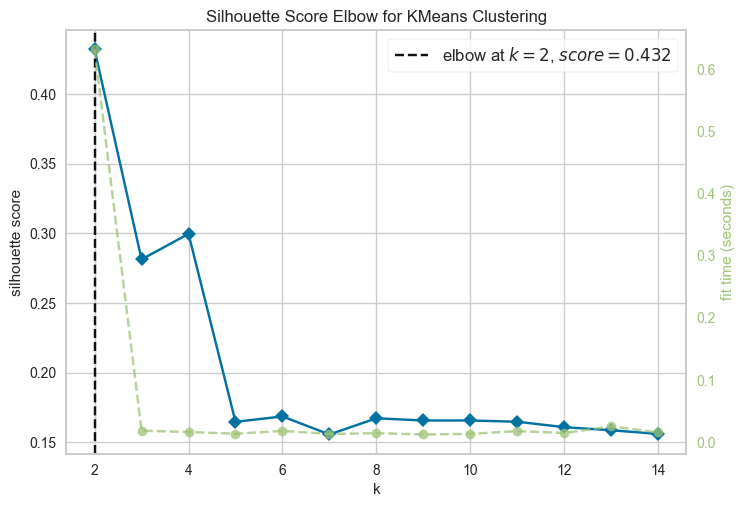

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
model= KMeans(random_state=42 )
visualizado=KElbowVisualizer(model,k=(2,15), metric="silhouette")  #el silhouette va de 0 a 1 siendo 1 mejor
visualizado.fit(df_encoded)
visualizado.show()

Linea verde refleja el tiempo de computación  
Linea azul es el score seleccionado  
Buscamos la mayor tasa de incremento entre el punto actual y el siguiente minimazndo la línea verde (Tiempo de computación)

In [32]:
modelo_kmeans= KMeans(n_clusters=2)
km_fit= modelo_kmeans.fit(df_encoded)  #Nos agrupa los datos en 2 grupos
km_fit.labels_ 
df_kmeans=df_encoded.copy()
df_kmeans["cluster"]= km_fit.labels_ 
df_kmeans.sample(5)

,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,cluster
name,,,,,,,,,,,,,
John Hernandez,0.314286,0.42,0.045045,0.465517,0.725,0.908397,0.586777,0.686131,1.000000,0.685714,0.0,1.0,1
Billy Torres,0.342857,0.39,1.000000,0.431034,0.250,0.427481,0.694215,1.000000,0.602649,0.485714,0.0,1.0,1
William Bisson,0.657143,0.42,0.315315,0.344828,0.225,0.427481,0.694215,1.000000,1.000000,0.228571,0.0,1.0,1
Russell Shannon,0.428571,0.56,0.981982,0.534483,0.450,0.908397,0.586777,0.094891,0.602649,0.542857,0.0,1.0,1
Diane Niebuhr,0.314286,0.53,0.315315,0.482759,0.150,1.000000,1.000000,0.445255,1.000000,0.714286,1.0,0.0,0


In [33]:
lista_cols_kmeans=df_kmeans.columns.drop("cluster")

GRÁFICAS PARA BUSCAR PATRONES EN LOS CLUSTERS

In [34]:
df_kmeans.head()

,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,year_start,gender_Female,gender_Male,cluster
name,,,,,,,,,,,,,
Aaron Peavy,0.657143,0.26,0.171171,0.293103,0.725,1.000000,0.826446,0.781022,1.000000,0.085714,1.0,0.0,0
Abe Rutland,0.514286,0.66,0.981982,0.603448,0.675,0.068702,0.586777,0.335766,0.185430,0.571429,0.0,1.0,1
Adrian Quinn,0.314286,0.53,0.981982,0.482759,1.000,0.847328,0.586777,0.781022,1.000000,0.742857,0.0,1.0,1
Alan Beckham,0.600000,0.71,0.981982,0.724138,0.675,1.000000,0.826446,0.686131,0.602649,0.485714,0.0,1.0,1
Albertha Rodriguez,0.314286,0.12,0.972973,0.120690,0.800,0.381679,0.694215,1.000000,1.000000,0.742857,1.0,0.0,0


In [35]:
lista_cols_kmeans

Index(['age', 'height', 'nationality', 'weight', 'sports', 'hours_per_day',
       'strength', 'agility', 'mental', 'year_start', 'gender_Female',
       'gender_Male'],
      dtype='object')

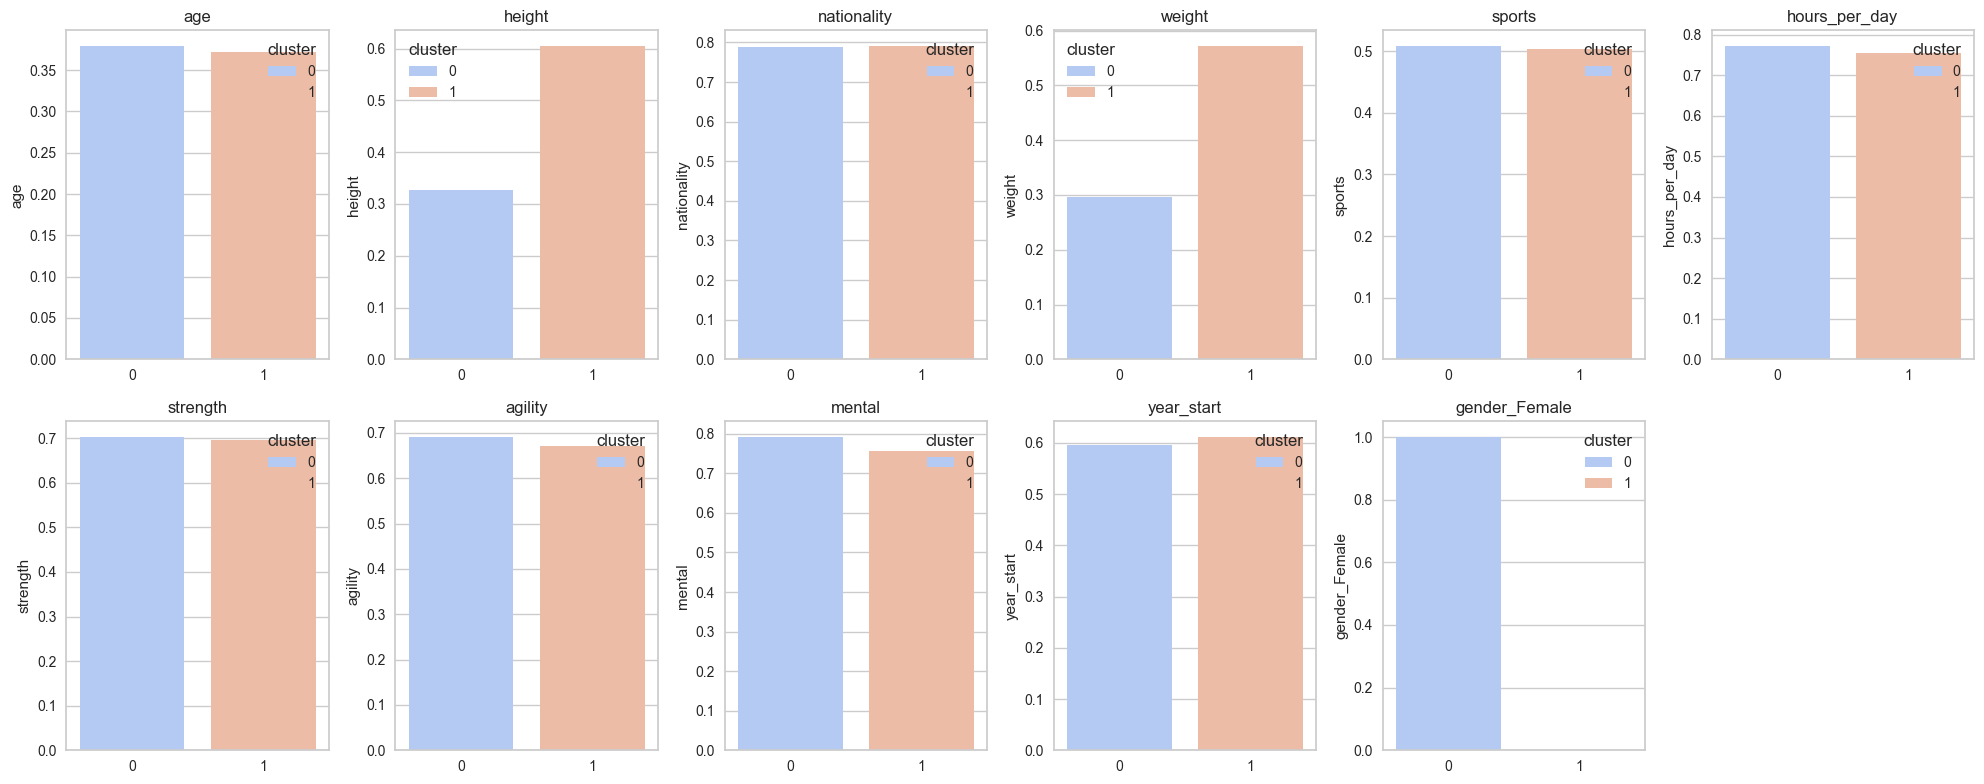

In [36]:
lista_cols
fig, axes =plt.subplots(nrows=2, ncols=math.ceil(len(lista_cols_kmeans)/2), figsize=(20,8))
axes=axes.flat
for indice, columna in enumerate(lista_cols_kmeans):
    df_group= df_kmeans.groupby("cluster")[columna].mean().reset_index()
    sns.barplot(x="cluster", y= columna ,hue="cluster", data= df_group, ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()
fig.delaxes(axes[-1])

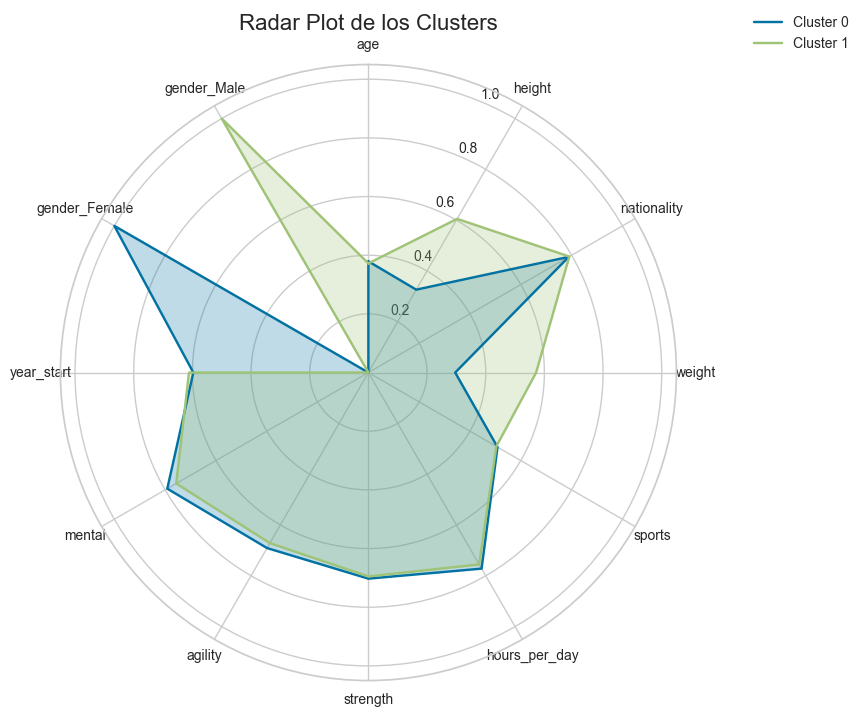

In [37]:
# Supongamos que 'df' es tu DataFrame
# Variables que deseas incluir en el radar plot
lista_cols_kmeans

# Agrupar por cluster y calcular la media
cluster_means = df_kmeans.groupby('cluster')[lista_cols_kmeans].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(lista_cols_kmeans)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lista_cols_kmeans)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()

#### METRICAS  
**silhoutte**  cohesion(como de agrupados estan los puntos) y separación(como de separados están los clusters) (1 exito(muy agrupados los puntos y muy separados los clusters), 0 o menor mal modelo (clusters poco especificos))--->***Minimiza la distancia entre los puntos más lejanos***  
  
**davies_bouldin**  compacidad(como de cerca están los puntos) y separación (como de separados están los clusters) (0 exito y 1 mal modelo)--->***Minimiza la distancia entre los puntos más cercanos***  
  
**cardinalidad**  numero de datos por clusters  

### CONCLUSIONES  
Lo que observamos tanto en el radar como en los barplots es que un cluster contiene  las mujeres y otro cluster contiene a los hombres. Eso explica porque las diferencias más significativas están en la altura y peso. Por ello el cluster 0 corresponde a las Mujeres y el cluster 1 reune a los hombres  